61637
61115


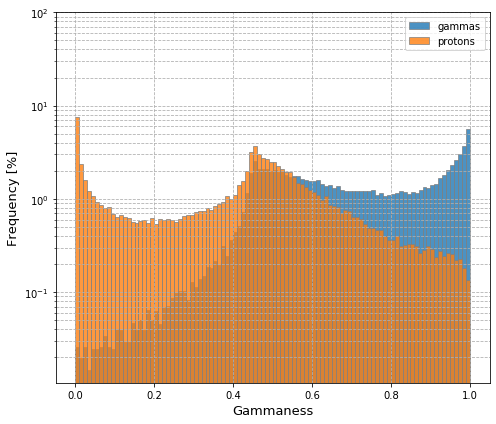

In [2]:
###############################################################################

####################### SEPARATION PROB DISTR BEST ############################                

###############################################################################

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

rnfser = '/home/pietro/ctasoft/CTA/trained/ResNetFSE_2020-03-20_01-20/ResNetFSE_09_0.73868_0.71434.h5_test.csv'
rnfse_csv = pd.read_csv(rnfser)

rnfse_csv_g = rnfse_csv[rnfse_csv['GroundTruth'] == 1]
rnfse_csv_p = rnfse_csv[rnfse_csv['GroundTruth'] == 0]

g_count = rnfse_csv_g.shape[0]
p_count = rnfse_csv_p.shape[0]

print(g_count)
print(p_count)

fig = plt.figure(figsize=(7, 6))

plt.hist(rnfse_csv_g['Predicted'], bins=100, density = True, label='gammas', alpha = 0.8, edgecolor='gray', linewidth=0.9)
plt.hist(rnfse_csv_p['Predicted'], bins=100, density = True, label='protons', alpha = 0.8, edgecolor='gray', linewidth=0.9)
plt.yscale('log')
plt.ylim(top=100)
plt.xlabel('Gammaness', fontsize=13)
plt.ylabel('Frequency [%]', fontsize=13)
plt.legend(loc='upper right')
plt.grid(b=True, which='major', linestyle='--')
plt.grid(b=True, which='minor', linestyle='--')

fig.tight_layout()
plt.show()
fig.savefig('separation_best_probdistr.pdf', format='pdf', bbox_inches='tight', transparent=False)

No handles with labels found to put in legend.


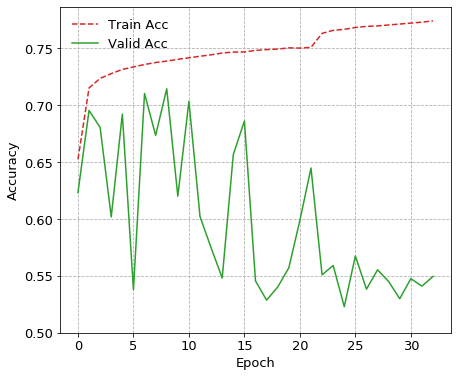

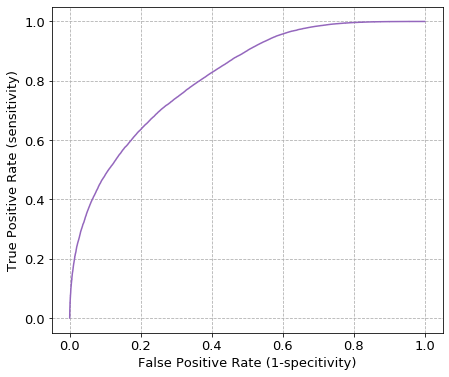

In [15]:
###############################################################################

############################## SEPARATION #####################################                

###############################################################################

from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import matplotlib
import pickle
import numpy as np
import pandas as pd

epochs_log = '/home/pietro/ctasoft/CTA/trained/ResNetFSE_2020-03-20_01-20/epochs_log.csv'
rnfser = '/home/pietro/ctasoft/CTA/trained/ResNetFSE_2020-03-20_01-20/ResNetFSE_09_0.73868_0.71434.h5_test.csv'

# HISTORY
ep_log_csv = pd.read_csv(epochs_log)
t_accuracy, t_loss, v_accuracy, v_loss = ep_log_csv['acc'], ep_log_csv['loss'], ep_log_csv['val_acc'], ep_log_csv['val_loss']  

# ROC
rnfse_csv = pd.read_csv(rnfser)
fpr_rnfse, tpr_rnfse, _ = roc_curve(rnfse_csv['GroundTruth'], rnfse_csv['Predicted'])

epochs = 31

# training & test accuracy
fig = plt.figure(figsize=(7, 6))

matplotlib.rcParams.update({'font.size': 13})
cmap = plt.get_cmap("tab10")
plt.plot(t_accuracy, label='Train Acc', color=cmap(3), linestyle='--')
plt.plot(v_accuracy, label='Valid Acc', color=cmap(2))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(bottom=0.5)
plt.legend(loc='upper left', fancybox=True, framealpha=0.)
plt.grid(b=True, which='major', linestyle='--')
plt.grid(b=True, which='minor', linestyle='--')


# training & test accuracy
fig = plt.figure(figsize=(7, 6))

matplotlib.rcParams.update({'font.size': 13})
cmap = plt.get_cmap("tab10")

plt.xlabel('False Positive Rate (1-specitivity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.legend(loc='lower right', fancybox=True, framealpha=0.)
plt.grid(b=True, which='major', linestyle='--')
plt.grid(b=True, which='minor', linestyle='--')
plt.plot(fpr_rnfse, tpr_rnfse, label='ResNetFSE', color=cmap(4))
